# Validaciones - Pobreza

#### Tablas 2010 - Personas - Total Pais

- Poblacion y porcentaje por Pobreza SI
- Poblacion y porcentaje por Indigencia SI


- Poblacion y porcentaje por Pobreza SI y AGLO SI
- Poblacion y porcentaje por Indigencia SI y AGLO SI


- Poblacion y porcentaje Por Pobreza SI y Aglomerado
- Poblacion y porcentaje Por Indigencia SI y Aglomerado


- Poblacion y porcentaje Por Pobreza SI y Provincia
- Poblacion y porcentaje Por Indigencia SI y Provincia



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles

In [2]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [3]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['Pobreza', 'Indigencia']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [4]:
# Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
#        'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
#        'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
#        'INGRESO_SBS', 'PP07K', 'P47T_persona', 'ANO4', 'Q', 'P0910',
#        'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
#        'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
#        'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
#        'NOMPROV', 'AGLOMERADO', 'Region'],
#       dtype='object')

## Personas. Total Pais. Poblacion por condicion de Pobreza / Indigencia

In [5]:
data = df10

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### Pobreza

,Cantidad,Porcentaje
Pobreza,,
False,22499350.0,56.2
True,17506050.0,43.8
TOTAL,40005400.0,100.0


### Indigencia

,Cantidad,Porcentaje
Indigencia,,
False,33920800.0,84.8
True,6084600.0,15.2
TOTAL,40005400.0,100.0


## Por AGLO SI/NO

In [6]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'AGLO_si'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e6, 2), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (mill.)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLO_si'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_)

### Pobreza

Cantidad (mill.)        Porcentaje (%)       
AGLO_si            False   True          False   True
Pobreza                                              
False               7.05  15.45           47.8   61.2
True                7.71   9.80           52.2   38.8
TOTAL              14.76  25.25          100.0  100.0

### Indigencia

Cantidad (mill.)        Porcentaje (%)       
AGLO_si               False   True          False   True
Indigencia                                              
False                 11.75  22.17           79.6   87.8
True                   3.01   3.07           20.4   12.2
TOTAL                 14.76  25.24          100.0  100.0

In [7]:
table = data.groupby(['Q', col])['Personas'].sum().unstack()
table_pct = 100*table.div(table.sum(1), axis = 0)

## En Aglomerados. Serie de Tiempo

### Pobreza. Personas.

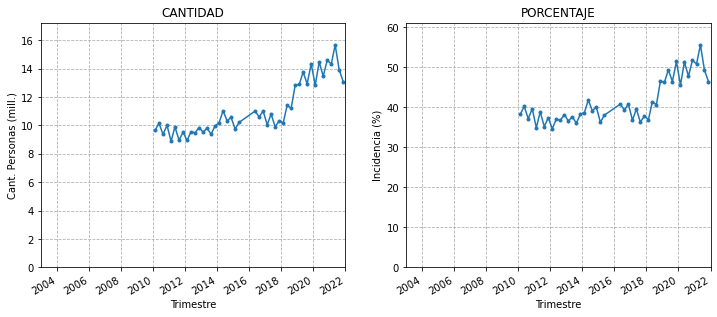

### Indigencia. Personas.

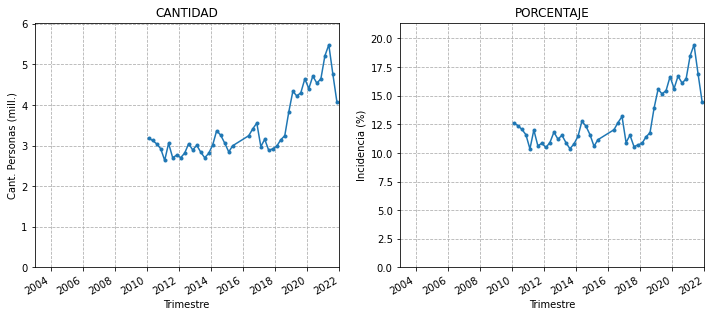

In [8]:
data = df.loc[(df.AGLO_si == True)]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col+'. Personas.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 5))

    table = data.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    table_pct[True].plot(ax =ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table_pct[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    table[True].plot(ax = ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')
    

    plt.show()

## Total Pais. Serie de Tiempo

### Pobreza. Personas.

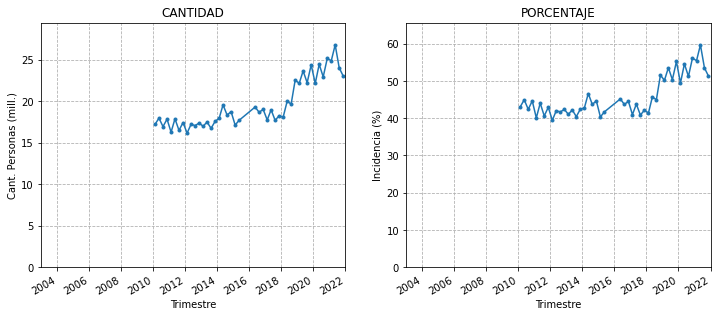

### Indigencia. Personas.

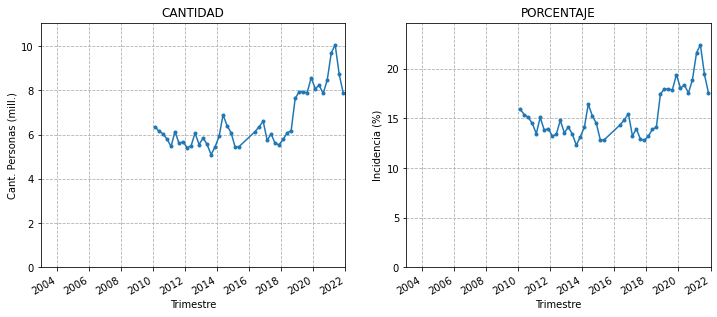

In [9]:
data = df#.loc[(df.AGLO_si == True)]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col+'. Personas.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 5))

    table = data.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)
    
    ax = axs[1]
    ax.set_title('PORCENTAJE')
    table_pct[True].plot(ax =ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table_pct[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Incidencia (%)')    

    ax = axs[0]
    ax.set_title('CANTIDAD')
    table[True].plot(ax = ax, marker = '.')
    ax.grid(linestyle = '--')
    ax.set_xlim('2003', '2022')
    ax.set_ylim(0, table[True].max()*1.1)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cant. Personas (mill.)')
    

    plt.show()

## Por AGLOMERADOS

In [10]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMAGLO'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLOMERADO'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                       False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  201.2           68.5             92.5   
CABA                         2399.8           83.7            468.1   
Catamarca                      95.4           54.4             80.2   
Cdro Rivadavia                125.0           78.2             35.0   
Concordia                      71.1           47.2             79.4   
Cordoba                       912.2           63.0            535.3   
Corrientes                    164.0           48.2            176.0   
Formosa                        97.4           44.2            123.0   
Fuera de aglom.              7051.8           47.8           7708.8   
GBA                          6168.1           57.8           4503.1   
Jujuy                         160.7           51.8            149.7   
La Plata                      518.4           65.7            271.0   
La Rioja                       84.1           48.1             90.8   
Mar del Plata                 405.2           66.9            200.4   
Mendoza                       541.4           58.2            388.2   
Neuquen                       231.0           66.7            115.3   
Parana                        168.8           61.8            104.4   
Posadas                       144.7           49.0            150.3   
Rawson-Trelew                  81.9           69.6             35.8   
Resistencia                   176.2           46.1            206.4   
Rio Cuarto                     95.2           63.5             54.7   
Rio Gallegos                   81.0           75.7             26.0   
Rosario                       748.6           63.1            437.7   
Salta                         290.6           52.6            262.4   
San Juan                      195.4           48.5            207.5   
San Luis                       91.4           49.7             92.5   
San Nicolas                   107.3           60.0             71.6   
Santa Fe                      274.3           57.4            203.3   
Santa Rosa                     76.2           67.8             36.1   
Sgo del Estero                179.8           49.9            180.7   
Tucuman                       426.1           52.5            385.2   
Ushuaia-Rio Grande             88.0           85.9             14.4   
Viedma-Patagones               47.2           70.0             20.2   

Pobreza                                      TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                 31.5            293.7          100.0  
CABA                         16.3           2867.9          100.0  
Catamarca                    45.6            175.6          100.0  
Cdro Rivadavia               21.8            160.0          100.0  
Concordia                    52.8            150.5          100.0  
Cordoba                      37.0           1447.5          100.0  
Corrientes                   51.8            340.0          100.0  
Formosa                      55.8            220.4          100.0  
Fuera de aglom.              52.2          14760.6          100.0  
GBA                          42.2          10671.2          100.0  
Jujuy                        48.2            310.4          100.0  
La Plata                     34.3            789.4          100.0  
La Rioja                     51.9            174.9          100.0  
Mar del Plata                33.1            605.6          100.0  
Mendoza                      41.8            929.6          100.0  
Neuquen                      33.3            346.3          100.0  
Parana                       38.2            273.2          100.0  
Posadas                      51.0            295.0          100.0  
Rawson-Trelew  

### Indigencia

Indigencia                    False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  268.0           91.3             25.6   
CABA                         2743.6           95.7            124.3   
Catamarca                     151.3           86.2             24.3   
Cdro Rivadavia                151.0           94.4              9.0   
Concordia                     120.6           80.1             29.9   
Cordoba                      1281.5           88.5            166.0   
Corrientes                    274.7           80.8             65.3   
Formosa                       174.1           79.0             46.3   
Fuera de aglom.             11746.3           79.6           3014.3   
GBA                          9319.1           87.3           1352.1   
Jujuy                         254.8           82.1             55.6   
La Plata                      704.0           89.2             85.4   
La Rioja                      152.2           87.0             22.8   
Mar del Plata                 553.4           91.4             52.2   
Mendoza                       819.2           88.1            110.4   
Neuquen                       310.0           89.5             36.4   
Parana                        244.4           89.5             28.8   
Posadas                       233.7           79.2             61.3   
Rawson-Trelew                 111.0           94.3              6.7   
Resistencia                   303.4           79.3             79.2   
Rio Cuarto                    136.0           90.7             14.0   
Rio Gallegos                   99.8           93.3              7.2   
Rosario                      1051.0           88.6            135.4   
Salta                         458.6           82.9             94.4   
San Juan                      340.2           84.4             62.7   
San Luis                      155.4           84.5             28.5   
San Nicolas                   152.6           85.3             26.3   
Santa Fe                      397.2           83.2             80.4   
Santa Rosa                    102.1           90.9             10.2   
Sgo del Estero                287.6           79.8             73.0   
Tucuman                       664.6           81.9            146.6   
Ushuaia-Rio Grande             98.5           96.2              3.9   
Viedma-Patagones               61.0           90.5              6.4   

Indigencia                                   TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                  8.7            293.6          100.0  
CABA                          4.3           2867.9          100.0  
Catamarca                    13.8            175.6          100.0  
Cdro Rivadavia                5.6            160.0          100.0  
Concordia                    19.9            150.5          100.0  
Cordoba                      11.5           1447.5          100.0  
Corrientes                   19.2            340.0          100.0  
Formosa                      21.0            220.4          100.0  
Fuera de aglom.              20.4          14760.6          100.0  
GBA                          12.7          10671.2          100.0  
Jujuy                        17.9            310.4          100.0  
La Plata                     10.8            789.4          100.0  
La Rioja                     13.0            175.0          100.0  
Mar del Plata                 8.6            605.6          100.0  
Mendoza                      11.9            929.6          100.0  
Neuquen                      10.5            346.4          100.0  
Parana                       10.5            273.2          100.0  
Posadas                      20.8            295.0          100.0  
Rawson-Trelew  

## Por PROVINCIAS

In [11]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMPROV'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'PROVINCIA'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                                    False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                              9248.0           59.2   
Catamarca                                  168.9           45.3   
Chaco                                      372.3           35.5   
Chubut                                     354.8           70.3   
Ciudad Autónoma de Buenos Aires           2400.7           83.7   
Corrientes                                 387.6           39.5   
Córdoba                                   1937.5           59.0   
Entre Ríos                                 633.0           51.2   
Formosa                                    184.7           34.5   
Jujuy                                      299.2           44.7   
La Pampa                                   198.8           62.4   
La Rioja                                   142.6           42.2   
Mendoza                                    890.4           51.0   
Misiones                                   390.0           35.2   
Neuquén                                    339.6           61.8   
Río Negro                                  404.2           64.1   
Salta                                      519.2           42.7   
San Juan                                   280.2           41.1   
San Luis                                   214.8           49.7   
Santa Cruz                                 195.3           70.3   
Santa Fe                                  1841.9           58.0   
Santiago del Estero                        340.9           39.5   
Tierra del Fuego                            99.6           83.4   
Tucumán                                    655.1           45.6   

Pobreza                                     True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                              6368.4           40.8   
Catamarca                                  204.0           54.7   
Chaco                                      676.6           64.5   
Chubut                                     149.9           29.7   
Ciudad Autónoma de Buenos Aires            468.2           16.3   
Corrientes                                 594.2           60.5   
Córdoba                                   1348.0           41.0   
Entre Ríos                                 602.6           48.8   
Formosa                                    350.2           65.5   
Jujuy                                      370.0           55.3   
La Pampa                                   119.6           37.6   
La Rioja                                   195.4           57.8   
Mendoza                                    854.0           49.0   
Misiones                                   716.4           64.8   
Neuquén                                    209.8           38.2   
Río Negro                                  226.4           35.9   
Salta                                      696.4           57.3   
San Juan                                   400.9           58.9   
San Luis                                   217.4           50.3   
Santa Cruz                                  82.3           29.7   
Santa Fe                                  1331.3           42.0   
Santiago del Estero                        521.2           60.5   
Tierra del Fuego                            19.8           16.6   
Tucumán                                    782.9           54.4   

Pobreza                                    TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15616.4          100.0  
Catamarca                                  372.9          100.0  
Chaco                                     1048.9  

### Indigencia

Indigencia                                 False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                             13698.3           87.7   
Catamarca                                  288.0           77.2   
Chaco                                      735.1           70.1   
Chubut                                     466.6           92.4   
Ciudad Autónoma de Buenos Aires           2744.6           95.7   
Corrientes                                 726.4           74.0   
Córdoba                                   2860.0           87.0   
Entre Ríos                                1027.4           83.1   
Formosa                                    366.2           68.5   
Jujuy                                      524.1           78.3   
La Pampa                                   280.2           88.0   
La Rioja                                   274.3           81.1   
Mendoza                                   1476.0           84.6   
Misiones                                   764.6           69.1   
Neuquén                                    473.8           86.2   
Río Negro                                  564.8           89.6   
Salta                                      921.9           75.8   
San Juan                                   543.3           79.8   
San Luis                                   366.7           84.8   
Santa Cruz                                 254.4           91.7   
Santa Fe                                  2703.6           85.2   
Santiago del Estero                        624.8           72.5   
Tierra del Fuego                           114.3           95.6   
Tucumán                                   1121.6           78.0   

Indigencia                                  True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                              1918.0           12.3   
Catamarca                                   84.9           22.8   
Chaco                                      313.8           29.9   
Chubut                                      38.2            7.6   
Ciudad Autónoma de Buenos Aires            124.4            4.3   
Corrientes                                 255.4           26.0   
Córdoba                                    425.6           13.0   
Entre Ríos                                 208.3           16.9   
Formosa                                    168.7           31.5   
Jujuy                                      145.2           21.7   
La Pampa                                    38.2           12.0   
La Rioja                                    63.7           18.9   
Mendoza                                    268.4           15.4   
Misiones                                   341.8           30.9   
Neuquén                                     75.6           13.8   
Río Negro                                   65.8           10.4   
Salta                                      293.7           24.2   
San Juan                                   137.8           20.2   
San Luis                                    65.5           15.2   
Santa Cruz                                  23.2            8.3   
Santa Fe                                   469.6           14.8   
Santiago del Estero                        237.3           27.5   
Tierra del Fuego                             5.2            4.4   
Tucumán                                    316.4           22.0   

Indigencia                                 TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15616.3          100.0  
Catamarca                                  372.9          100.0  
Chaco                                     1048.9  